In [24]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [25]:
pd.set_option('max_colwidth', 800)

data_read = pd.read_csv('67401711.csv')

In [26]:
data_read.head(2)

,Unnamed: 0,text,created_at,author_id,id
0,0,@MercantilBanco Buenas tardes intento abrir mi mercantil en línea y dice datos y clave incorrecta...está fallando la plataforma?,2021-04-28T22:47:36.000Z,202148873,1387539021983850497
1,1,@MercantilBanco Buenas tardes! En esta oportunidad les escribo para saber si hay problemas con la plataforma para realizar transferencias a otras cuentas mercantil ya que al momento de realizar una transferencia me arroja el mensaje de que intente más tardes!,2021-04-28T22:46:07.000Z,1274553941917863936,1387538646832648197


In [27]:
analyzer = SentimentIntensityAnalyzer()

In [31]:
diccionario_analisis = {'neg':[], 'neu':[], 'pos' : [], 'compound' : []}

indice = 0

for indice_fila, fila in data_read.iterrows():
    analisis = analyzer.polarity_scores(fila.text)
    diccionario_analisis['neg'].append(analisis['neg'])
    diccionario_analisis['neu'].append(analisis['neu'])
    diccionario_analisis['pos'].append(analisis['pos'])
    diccionario_analisis['compound'].append(analisis['compound'])
    indice += 1
    if indice == 50:
        break

In [29]:
len(diccionario_analisis['neg'])

1

In [32]:
pd.DataFrame(diccionario_analisis)

,neg,neu,pos,compound
0,0.226,0.671,0.102,-0.5423
1,0.061,0.860,0.079,0.1984
2,0.000,0.722,0.278,0.4019
3,0.000,0.803,0.197,0.4019
4,0.105,0.895,0.000,-0.5106
5,0.218,0.673,0.108,-0.4479
6,0.151,0.615,0.235,0.1280
7,0.000,0.838,0.162,0.4404
8,0.144,0.718,0.139,-0.0258
9,0.078,0.754,0.168,0.4767


In [33]:
resultados = data_read.copy()
resultados = resultados[0:len(diccionario_analisis['neg'])]

for i in diccionario_analisis.keys():
    resultados[i] = diccionario_analisis[i]

In [35]:
resultados.head()

,Unnamed: 0,text,created_at,author_id,id,neg,neu,pos,compound
0,0,@MercantilBanco Buenas tardes intento abrir mi mercantil en línea y dice datos y clave incorrecta...está fallando la plataforma?,2021-04-28T22:47:36.000Z,202148873,1387539021983850497,0.226,0.671,0.102,-0.5423
1,1,@MercantilBanco Buenas tardes! En esta oportunidad les escribo para saber si hay problemas con la plataforma para realizar transferencias a otras cuentas mercantil ya que al momento de realizar una transferencia me arroja el mensaje de que intente más tardes!,2021-04-28T22:46:07.000Z,1274553941917863936,1387538646832648197,0.061,0.860,0.079,0.1984
2,2,@MercantilBanco Deseo es reponer mi tarjeta de débito,2021-04-28T22:32:15.000Z,343710274,1387535156626526209,0.000,0.722,0.278,0.4019
3,3,"@jesusmdbtw2012 @MercantilBanco Si lo está, estoy en la misma situación",2021-04-28T22:06:42.000Z,1323258072534552577,1387528726712311812,0.000,0.803,0.197,0.4019
4,4,"El @MercantilBanco me quito 180.000 Bs por 4 mensajes de texto al 24024 solicitando clave temporal para un pago móvil, la cual nunca llego, son ladrones o no? https://t.co/bVVmvxfhjH",2021-04-28T21:48:28.000Z,1099360339207049218,1387524137904754689,0.105,0.895,0.000,-0.5106


<AxesSubplot:>

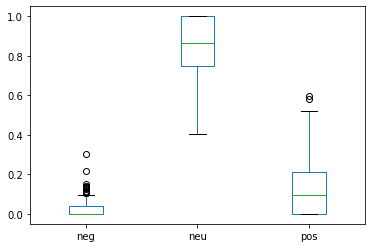

In [21]:
resultados[['neg','neu','pos']].plot(kind='box') #la amplia mayoría son neutros

<AxesSubplot:>

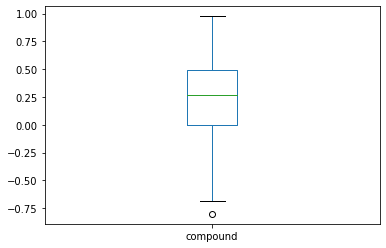

In [85]:
resultados['compound'].plot(kind='box') #el compound no nos da tanta información

<AxesSubplot:xlabel='pos'>

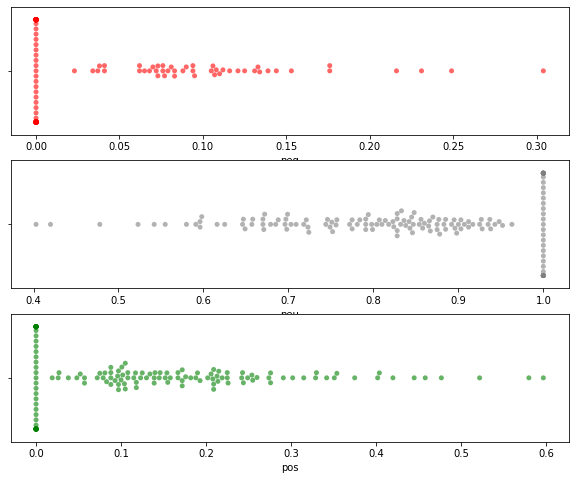

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows = 3, ncols = 1, figsize = (10,8))

sns.swarmplot(resultados.neg , ax = ax[0], color = 'red', alpha = 0.6)
sns.swarmplot(resultados.neu , ax = ax[1], color = 'grey', alpha = 0.6)
sns.swarmplot(resultados.pos , ax = ax[2], color = 'green', alpha = 0.6)

In [112]:
resultados

,Unnamed: 0,author_id,created_at,id,text,neg,neu,pos,compound
0,0,601856885,2021-04-27T18:01:08.000Z,1387104539648667649,"@MercantilBanco buenas tardes, que debo hacer ...",0.000,0.658,0.342,0.6369
1,1,49336014,2021-04-27T18:00:24.000Z,1387104354910539778,@MercantilBanco requiero hacer un pago electró...,0.000,0.810,0.190,0.6322
2,2,1387101068853714950,2021-04-27T17:52:39.000Z,1387102405041524742,@MercantilBanco estoy afiliado a t pago no pue...,0.000,1.000,0.000,0.0000
3,3,32323041,2021-04-27T17:34:08.000Z,1387097747665391617,@MercantilBanco buenas tardes. Estoy tratando ...,0.077,0.885,0.038,-0.4515
4,4,76481335,2021-04-27T17:10:12.000Z,1387091723269115904,@libilis1 @MercantilBanco Ni a mi,0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...,...,...,...
144,44,836716219,2021-04-21T15:28:55.000Z,1384891908481224706,@MercantilBanco Necesito ayuda... no he podido...,0.072,0.752,0.176,0.4898
145,45,138139167,2021-04-21T15:23:34.000Z,1384890561296048131,@MercantilBanco saludos deberían revisar esa o...,0.094,0.657,0.249,0.5106
146,46,108459559,2021-04-21T15:20:04.000Z,1384889679871369217,@MercantilBanco como pueden ayudar?tengo una s...,0.000,0.870,0.130,0.4019
147,47,107767934,2021-04-21T15:14:04.000Z,1384888171490517001,@MercantilBanco el vencimiento de la clave tel...,0.000,0.917,0.083,0.2716


In [121]:
tags = ['neg' , 'neu', 'pos']

In [127]:
resultados[tags]

,neg,neu,pos
0,0.000,0.658,0.342
1,0.000,0.810,0.190
2,0.000,1.000,0.000
3,0.077,0.885,0.038
4,0.000,1.000,0.000
...,...,...,...
144,0.072,0.752,0.176
145,0.094,0.657,0.249
146,0.000,0.870,0.130
147,0.000,0.917,0.083


In [166]:
resultados['score'] = resultados[tags].idxmax(axis=1)

In [167]:
resultados

,Unnamed: 0,author_id,created_at,id,text,neg,neu,pos,compound,score
0,0,601856885,2021-04-27T18:01:08.000Z,1387104539648667649,"@MercantilBanco buenas tardes, que debo hacer para poder aumentar el límite de mis TDC ?",0.000,0.658,0.342,0.6369,neu
1,1,49336014,2021-04-27T18:00:24.000Z,1387104354910539778,@MercantilBanco requiero hacer un pago electrónico para una sucesión. La plataforma del banco permite imprimir ese pago? Es seguro?,0.000,0.810,0.190,0.6322,neu
2,2,1387101068853714950,2021-04-27T17:52:39.000Z,1387102405041524742,@MercantilBanco estoy afiliado a t pago no puedo hacer pago movil en la pagina de inter y en mi telefono no veo los contactos que hago,0.000,1.000,0.000,0.0000,neu
3,3,32323041,2021-04-27T17:34:08.000Z,1387097747665391617,"@MercantilBanco buenas tardes. Estoy tratando de recargar saldo a un celular Movistar desde mi cuenta mercantil, pero me dice que no pueden procesar mi operación, que lo intente más tarde. Tienen algún problema con Movistar? Que puedo hacer? Me urge recargar el saldo.",0.077,0.885,0.038,-0.4515,neu
4,4,76481335,2021-04-27T17:10:12.000Z,1387091723269115904,@libilis1 @MercantilBanco Ni a mi,0.000,1.000,0.000,0.0000,neu
...,...,...,...,...,...,...,...,...,...,...
144,44,836716219,2021-04-21T15:28:55.000Z,1384891908481224706,@MercantilBanco Necesito ayuda... no he podido hacer un pago móvil que es urgente!!! No tengo respuesta de su parte...,0.072,0.752,0.176,0.4898,neu
145,45,138139167,2021-04-21T15:23:34.000Z,1384890561296048131,@MercantilBanco saludos deberían revisar esa opción para cancelar me indica no disponible para el pago. gracias,0.094,0.657,0.249,0.5106,neu
146,46,108459559,2021-04-21T15:20:04.000Z,1384889679871369217,@MercantilBanco como pueden ayudar?tengo una semana tratando de actualizar mi clave de internet y entrar al portal,0.000,0.870,0.130,0.4019,neu
147,47,107767934,2021-04-21T15:14:04.000Z,1384888171490517001,"@MercantilBanco el vencimiento de la clave telefónica no friega a uno en el momento más importante, de paso no puede cambiarse desde la app.",0.000,0.917,0.083,0.2716,neu


In [164]:
resultados[tags].idxmax(axis=1).value_counts()

neu    146
pos      3
dtype: int64

---------
---------
------

In [143]:
data_read.text

0      @MercantilBanco buenas tardes, que debo hacer ...
1      @MercantilBanco requiero hacer un pago electró...
2      @MercantilBanco estoy afiliado a t pago no pue...
3      @MercantilBanco buenas tardes. Estoy tratando ...
4                      @libilis1 @MercantilBanco Ni a mi
                             ...                        
795    @MercantilBanco Simplifiquen instrumentos. Uni...
796    @MercantilBanco La app tpago no sirveeeee.! Po...
797    Distinguida junta directiva del @MercantilBanc...
798                  @MercantilBanco Te he intentado kit
799                  @MercantilBanco ..\n\nJoomla que me
Name: text, Length: 800, dtype: object